In [1]:
import numpy as np
import pandas as pd
import tweepy
import json
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
from nltk.corpus import stopwords
sw=stopwords.words("english")
import statsmodels.api as sm

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_colwidth', -1)

# gathering and formating

In [3]:
folder_name ='Supporting Materials'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

wb b is for writing image file

In [4]:
url= ['https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv',
     'https://video.udacity-data.com/topher/2018/November/5bf60c1e_twitter-archive-enhanced-2/twitter-archive-enhanced-2.csv',
     'https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt']
for i in url:
    response = requests.get(i)
    with open(os.path.join(folder_name,i.split('/')[-1]), mode='wb') as f:
        f.write(response.content)

In [5]:
archive_df=pd.read_csv('Supporting Materials/twitter-archive-enhanced-2.csv')

In [6]:
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [7]:
image_df = pd.read_csv('Supporting Materials/image-predictions.tsv',sep='\t')

In [8]:
image_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> ## obtain json file from API, change to code format when needed
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit =True,wait_on_rate_limit_notify=True)

id_of_tweet=archive_df['tweet_id'].values

t0=time.time()
fails=[]
with open('tweet_json.txt','w') as f:
    count=0
    for i in id_of_tweet:
        count+=1
        print(count,':', i)
        try:
            tweet = api.get_status(i,tweet_mode='extended')
            print('success')
            json.dump(tweet._json,f)
            f.write('\n')
        except:
            print('fail')
            fails.append[i]
print(time.time()-t0)
print(fails)

In [9]:
tweetlist=[]
with open('Supporting Materials/tweet-json.txt') as f:
    for line in f:
        data=json.loads(line)
        tweet_id=data['id']
        retweet_count=data['retweet_count']
        favourite_count=data['favorite_count']
        tweetdict={'tweet_id':tweet_id,
                  'retweet_count':retweet_count,
                  'favourite_count':favourite_count}
        tweetlist.append(tweetdict)

In [10]:
json_df=pd.DataFrame(tweetlist)

In [11]:
json_df.head()

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [12]:
# make copies
adf = archive_df.copy(deep=False)
idf = image_df.copy(deep=False)
jdf = json_df.copy(deep=False)

In [13]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

# wrangling
###### adf

In [14]:
for i ,z in enumerate(adf):
    print (i,z)

0 tweet_id
1 in_reply_to_status_id
2 in_reply_to_user_id
3 timestamp
4 source
5 text
6 retweeted_status_id
7 retweeted_status_user_id
8 retweeted_status_timestamp
9 expanded_urls
10 rating_numerator
11 rating_denominator
12 name
13 doggo
14 floofer
15 pupper
16 puppo


> drop duplicates

In [15]:
adf=adf[adf['retweeted_status_id'].isna()]

> drop columns

In [16]:
adf.columns[np.r_[1:3,4,6:9]]

Index(['in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp'],
      dtype='object')

In [17]:
adf.drop(adf.columns[np.r_[1:3,4,6:9]],axis=1,inplace=True)

In [18]:
adf

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50 +0000,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52 +0000,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54 +0000,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30 +0000,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [19]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


> change datatypes

In [20]:
adf['timestamp']=adf['timestamp'].astype('datetime64')
adf['tweet_id']=adf['tweet_id'].astype(str)
adf[['rating_numerator','rating_denominator']]=adf[['rating_numerator','rating_denominator']].astype('float64')

>reextract names

In [21]:
names=adf.copy()

In [22]:
names['name'].value_counts()

None          680
a             55 
Charlie       11 
Lucy          11 
Cooper        10 
              .. 
Jordy         1  
Dunkin        1  
Longfellow    1  
Brownie       1  
Goliath       1  
Name: name, Length: 956, dtype: int64

In [23]:
testdf=names['text'].str.extract(r'\w?([Tt]his is [A-Z][A-Za-z]+)|\w?(hello to [A-Z][A-Za-z]+)|\w?(Meet [A-Z][A-Za-z]+)|\w?([Tt]hat is [A-Z][A-Za-z]+)|\w?([Tt]his is [A-Z].[A-Z][A-Za-z]+)|\w?(named [A-Z][A-Za-z]+)')
testdf

,0,1,2,3,4,5
0,This is Phineas,NaN,NaN,NaN,NaN,NaN
1,This is Tilly,NaN,NaN,NaN,NaN,NaN
2,This is Archie,NaN,NaN,NaN,NaN,NaN
3,This is Darla,NaN,NaN,NaN,NaN,NaN
4,This is Franklin,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2351,NaN,NaN,NaN,NaN,NaN,NaN
2352,NaN,NaN,NaN,NaN,NaN,NaN
2353,NaN,NaN,NaN,NaN,NaN,NaN
2354,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
cols=[0,1,2,3,4,5]
for i in cols:
    testdf[0]= testdf[0].fillna(testdf[i])

In [25]:
testdf[0].value_counts()

This is Lucy       10
This is Cooper     9 
This is Penny      8 
This is Oliver     8 
This is Tucker     8 
                  .. 
Meet Gary          1 
This is Bungalo    1 
hello to Mimosa    1 
Meet Zeek          1 
This is Cheryl     1 
Name: 0, Length: 1065, dtype: int64

In [26]:
names['name']=testdf[0].str.split(' ').str[-1]

In [27]:
names[['text','name']].sample(10)

,text,name
1206,This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10 https://t.co/wJX74TSgzP,NaN
714,This is Balto. He's very content. Legendary tongue slippage. 12/10 would pet forever https://t.co/T7Jr4Gw4sC,Balto
593,This is Shadow. He's a firm believer that they're all good dogs. H*ckin passionate about it too. 11/10 I stand with Shadow https://t.co/8yvpacwBcu,Shadow
2173,Meet Ralf. He's a miniature Buick DiCaprio. Can float (whoa). Loves to beach. Snazzy green vest. 11/10 I'd hug Ralf https://t.co/R5Z6jBTdhc,Ralf
668,This is Bruce. He never backs down from a challenge. 11/10 you got this Bruce https://t.co/aI7umZHIq7,Bruce
875,This is Albert. He just found out that bees are dying globally at an alarming rate. 10/10 heckin worried af now https://t.co/nhLX27WsDY,Albert
10,This is Koda. He is a South Australian deckshark. Deceptively deadly. Frighteningly majestic. 13/10 would risk a petting #BarkWeek https://t.co/dVPW0B0Mme,Koda
752,This is Jay. He's really h*ckin happy about the start of fall. Sneaky tongue slip in 2nd pic. 11/10 snuggly af https://t.co/vyx1X5eyWI,Jay
1146,When you're trying to enjoy yourself but end up having to take care of your way too drunk friend. 11/10 https://t.co/BRkhj6tdN0,NaN
2135,"This is Liam. He has a particular set of skills. He will look for you, he will find you, and he will kill you. 11/10 https://t.co/uQMFKv1vjn",Liam


In [28]:
adf['name']=names['name']

In [29]:
adf

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,None,None,None,None
2352,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,None,None,None,None
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,None,None,None,None
2354,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,None,None,None,None


> slash off http in text

In [30]:
adf['text']=adf['text'].str.split('http').str[0]

> re extract dog stages and format to lowercase

In [31]:
adf['doggo']=adf['text'].str.extract('([Dd]oggo)')
adf['floofer']=adf['text'].str.extract('([Ff]loofer)')
adf['pupper']=adf['text'].str.extract('([Pp]upper)')
adf['puppo']=adf['text'].str.extract('([Pp]uppo)')

In [32]:
new=['doggo','floofer','pupper','puppo']
for i in new:
    adf[i]=adf[i].str.lower()
    print(adf[i].value_counts())

doggo    94
Name: doggo, dtype: int64
floofer    10
Name: floofer, dtype: int64
pupper    257
Name: pupper, dtype: int64
puppo    33
Name: puppo, dtype: int64


In [33]:
adf

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13.0,10.0,Phineas,NaN,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13.0,10.0,Tilly,NaN,NaN,NaN,NaN
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12.0,10.0,Archie,NaN,NaN,NaN,NaN
3,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13.0,10.0,Darla,NaN,NaN,NaN,NaN
4,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12.0,10.0,Franklin,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2352,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6.0,10.0,NaN,NaN,NaN,NaN,NaN
2353,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9.0,10.0,NaN,NaN,NaN,NaN,NaN
2354,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7.0,10.0,NaN,NaN,NaN,NaN,NaN


> restructure dog stage column

In [34]:
for i in enumerate(adf):
    print(i)

(0, 'tweet_id')
(1, 'timestamp')
(2, 'text')
(3, 'expanded_urls')
(4, 'rating_numerator')
(5, 'rating_denominator')
(6, 'name')
(7, 'doggo')
(8, 'floofer')
(9, 'pupper')
(10, 'puppo')


In [35]:
# fillnas
adf.iloc[:,7:]=adf.iloc[:,7:].apply(lambda x: x.fillna(''))

In [36]:
# combine
adf['dogstage']=adf['doggo']
for i in new[1:]:
    adf['dogstage']+=adf[i]

In [37]:
adf['dogstage'].value_counts()

                1794
pupper          247 
doggo           81  
puppo           31  
doggopupper     10  
floofer         9   
doggopuppo      2   
doggofloofer    1   
Name: dogstage, dtype: int64

In [38]:
# rename multi
adf['dogstage']=['multistage' if i =='doggopupper' or i=='doggopuppo' or i=='doggofloofer' else i for i in adf['dogstage']]
adf['dogstage'].value_counts()

              1794
pupper        247 
doggo         81  
puppo         31  
multistage    13  
floofer       9   
Name: dogstage, dtype: int64

In [39]:
## place np.nan back
adf['dogstage'].replace('',np.nan, inplace=True)

In [40]:
## drop extra cols
for i in enumerate(adf):
    print(i)

(0, 'tweet_id')
(1, 'timestamp')
(2, 'text')
(3, 'expanded_urls')
(4, 'rating_numerator')
(5, 'rating_denominator')
(6, 'name')
(7, 'doggo')
(8, 'floofer')
(9, 'pupper')
(10, 'puppo')
(11, 'dogstage')


In [41]:
adf=adf.iloc[:,np.r_[:7,11]]

In [42]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null datetime64[ns]
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null float64
rating_denominator    2175 non-null float64
name                  1414 non-null object
dogstage              381 non-null object
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 152.9+ KB


> re extract `rating_numerator`, `rating_denominator`

In [43]:
#pd.options.mode.chained_assignment = None  # default='warn'

In [44]:
adf['rating_numerator']=adf['text'].str.extract(r'([1-9]\d+/10)').apply(lambda x: x.str.split('/').str[0])
adf['rating_denominator']=adf['text'].str.extract(r'([1-9]\d+/10)').apply(lambda x: x.str.split('/').str[1])

In [45]:
adf['rating_numerator'].value_counts()

12      500
10      444
11      427
13      310
14      44 
420     2  
1776    1  
75      1  
15      1  
27      1  
666     1  
17      1  
182     1  
26      1  
Name: rating_numerator, dtype: int64

In [46]:
# create quotient
adf['quotient']=adf['rating_numerator'].astype('float64')/adf['rating_denominator'].astype('float64')
adf['quotient'].count()

1735

In [47]:
adf.drop(['rating_numerator','rating_denominator'],axis=1,inplace=True)

In [48]:
adf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id         2175 non-null object
timestamp        2175 non-null datetime64[ns]
text             2175 non-null object
expanded_urls    2117 non-null object
name             1414 non-null object
dogstage         381 non-null object
quotient         1735 non-null float64
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 135.9+ KB


###### idf

In [49]:
idf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [50]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [51]:
idf['tweet_id']=idf['tweet_id'].astype(str)

In [52]:
# keep dogs only
idf=idf.query('p1_dog==1 or p2_dog==1 or p3_dog==1')

In [53]:
idf.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1649,809084759137812480,https://pbs.twimg.com/media/CzpyM41UoAE1b2w.jpg,1,vizsla,0.911412,True,bloodhound,0.017134,True,Labrador_retriever,0.011761,True
601,679777920601223168,https://pbs.twimg.com/media/CW8OYajUMAAPRoF.jpg,1,bloodhound,0.528819,True,bull_mastiff,0.420119,True,French_bulldog,0.009481,True
1151,732375214819057664,https://pbs.twimg.com/media/CinrX2EWkAABDYt.jpg,1,tennis_ball,0.998673,False,basset,0.000547,True,golden_retriever,0.000360,True
338,672239279297454080,https://pbs.twimg.com/media/CVRGDrsWsAAUWSF.jpg,1,pug,0.332536,True,French_bulldog,0.258124,True,bull_mastiff,0.120873,True
740,687312378585812992,https://pbs.twimg.com/media/CYnS9VWW8AAeR8m.jpg,1,seat_belt,0.703561,False,Great_Dane,0.139909,True,Weimaraner,0.021112,True


#### extracurricular: convert df to dict

In [54]:
idf.iloc[:,3:].sample(3).to_dict()

{'p1': {2061: 'French_bulldog', 1279: 'Shih-Tzu', 1150: 'English_setter'},
 'p1_conf': {2061: 0.99165, 1279: 0.814405, 1150: 0.677408},
 'p1_dog': {2061: True, 1279: True, 1150: True},
 'p2': {2061: 'boxer', 1279: 'Lhasa', 1150: 'Border_collie'},
 'p2_conf': {2061: 0.00212864, 1279: 0.17522, 1150: 0.052724},
 'p2_dog': {2061: True, 1279: True, 1150: True},
 'p3': {2061: 'Staffordshire_bullterrier',
  1279: 'Pekinese',
  1150: 'cocker_spaniel'},
 'p3_conf': {2061: 0.00149818, 1279: 0.0080723, 1150: 0.0485719},
 'p3_dog': {2061: True, 1279: True, 1150: True}}

In [55]:
idf['breed']=idf.query("p1_dog==1").p1

In [56]:
idf['breed']=idf['breed'].fillna(idf.query("p1_dog==0 and p2_dog==1").p2)

In [57]:
idf['breed']=idf['breed'].fillna(idf.query("p1_dog==0 and p2_dog==0 and p3_dog==1").p3)

In [58]:
# drop columns
for i in enumerate(idf):
    print(i)

(0, 'tweet_id')
(1, 'jpg_url')
(2, 'img_num')
(3, 'p1')
(4, 'p1_conf')
(5, 'p1_dog')
(6, 'p2')
(7, 'p2_conf')
(8, 'p2_dog')
(9, 'p3')
(10, 'p3_conf')
(11, 'p3_dog')
(12, 'breed')


In [59]:
idf.drop(idf.columns[1:12],axis=1,inplace=True)

In [60]:
idf['breed']=idf['breed'].str.lower()

In [61]:
idf['breed']

0       welsh_springer_spaniel  
1       redbone                 
2       german_shepherd         
3       rhodesian_ridgeback     
4       miniature_pinscher      
               ...              
2069    chesapeake_bay_retriever
2070    basset                  
2071    labrador_retriever      
2072    chihuahua               
2073    chihuahua               
Name: breed, Length: 1751, dtype: object

In [62]:
idf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 2 columns):
tweet_id    1751 non-null object
breed       1751 non-null object
dtypes: object(2)
memory usage: 41.0+ KB


###### jdf

In [63]:
jdf

,tweet_id,retweet_count,favourite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [64]:
jdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id           2354 non-null int64
retweet_count      2354 non-null int64
favourite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [65]:
jdf['tweet_id']=jdf['tweet_id'].astype(str)

In [66]:
# merge
df=adf.merge(idf)
df.merge(jdf)

,tweet_id,timestamp,text,expanded_urls,name,dogstage,quotient,breed,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2,chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,1.3,labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,1.2,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,NaN,1.3,chesapeake_bay_retriever,3261,20562
...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,NaN,NaN,miniature_pinscher,41,111
1682,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,NaN,NaN,rhodesian_ridgeback,147,311
1683,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,NaN,NaN,german_shepherd,47,128
1684,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,NaN,NaN,NaN,redbone,48,132


In [67]:
# concat
pd.concat([adf.set_index('tweet_id'),idf.set_index('tweet_id'),jdf.set_index('tweet_id')],axis=1,join='inner').reset_index()

,tweet_id,timestamp,text,expanded_urls,name,dogstage,quotient,breed,retweet_count,favourite_count
0,892177421306343426,2017-08-01 00:17:27,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,Tilly,NaN,1.3,chihuahua,6514,33819
1,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,Archie,NaN,1.2,chihuahua,4328,25461
2,891689557279858688,2017-07-30 15:58:51,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,Darla,NaN,1.3,labrador_retriever,8964,42908
3,891327558926688256,2017-07-29 16:00:24,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",Franklin,NaN,1.2,basset,9774,41048
4,891087950875897856,2017-07-29 00:08:17,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,NaN,NaN,1.3,chesapeake_bay_retriever,3261,20562
...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,NaN,NaN,NaN,miniature_pinscher,41,111
1682,666044226329800704,2015-11-16 00:04:52,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,NaN,NaN,NaN,rhodesian_ridgeback,147,311
1683,666033412701032449,2015-11-15 23:21:54,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,NaN,NaN,NaN,german_shepherd,47,128
1684,666029285002620928,2015-11-15 23:05:30,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,NaN,NaN,NaN,redbone,48,132


In [68]:
masterdf=pd.concat([adf.set_index('tweet_id'),idf.set_index('tweet_id'),jdf.set_index('tweet_id')],axis=1,join='inner').reset_index()

In [69]:
masterdf['dogstage']=masterdf['dogstage'].astype('category')

In [70]:
# rearange
masterdf=masterdf[['tweet_id','timestamp','name','dogstage','quotient','breed','retweet_count','favourite_count','text','expanded_urls']]

In [71]:
# save
masterdf.to_csv('twitter_archive_master.csv',index=False)

# analysis

In [72]:
masterdf

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls
0,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,1.3,chihuahua,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1
1,891815181378084864,2017-07-31 00:18:03,Archie,NaN,1.2,chihuahua,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1
2,891689557279858688,2017-07-30 15:58:51,Darla,NaN,1.3,labrador_retriever,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1
3,891327558926688256,2017-07-29 16:00:24,Franklin,NaN,1.2,basset,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1"
4,891087950875897856,2017-07-29 00:08:17,NaN,NaN,1.3,chesapeake_bay_retriever,3261,20562,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1
...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50,NaN,NaN,NaN,miniature_pinscher,41,111,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1
1682,666044226329800704,2015-11-16 00:04:52,NaN,NaN,NaN,rhodesian_ridgeback,147,311,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1
1683,666033412701032449,2015-11-15 23:21:54,NaN,NaN,NaN,german_shepherd,47,128,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1
1684,666029285002620928,2015-11-15 23:05:30,NaN,NaN,NaN,redbone,48,132,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1


In [73]:
masterdf.describe()

,quotient,retweet_count,favourite_count
count,1400.000000,1686.000000,1686.000000
mean,1.149143,2817.118031,9233.109727
std,0.209835,4807.199770,12583.246963
min,1.000000,16.000000,81.000000
25%,1.000000,649.250000,2163.250000
50%,1.100000,1437.500000,4440.000000
75%,1.200000,3247.750000,11656.750000
max,7.500000,79515.000000,132810.000000


> univariant distribution

In [74]:
# name
namedist=masterdf['name'].value_counts()
namedist

Lucy          10
Charlie       10
Cooper        10
Tucker        9 
Oliver        9 
             .. 
Kevon         1 
Dunkin        1 
Longfellow    1 
Bronte        1 
Goliath       1 
Name: name, Length: 850, dtype: int64

In [75]:
# dogstage
agedist=masterdf['dogstage'].value_counts()
agedist

pupper        185
doggo         57 
puppo         26 
multistage    11 
floofer       7  
Name: dogstage, dtype: int64

In [76]:
# breed
breeddist=masterdf['breed'].value_counts()
breeddist

golden_retriever        158
labrador_retriever      108
pembroke                95 
chihuahua               91 
pug                     62 
                        .. 
scotch_terrier          1  
standard_schnauzer      1  
japanese_spaniel        1  
bouvier_des_flandres    1  
silky_terrier           1  
Name: breed, Length: 113, dtype: int64

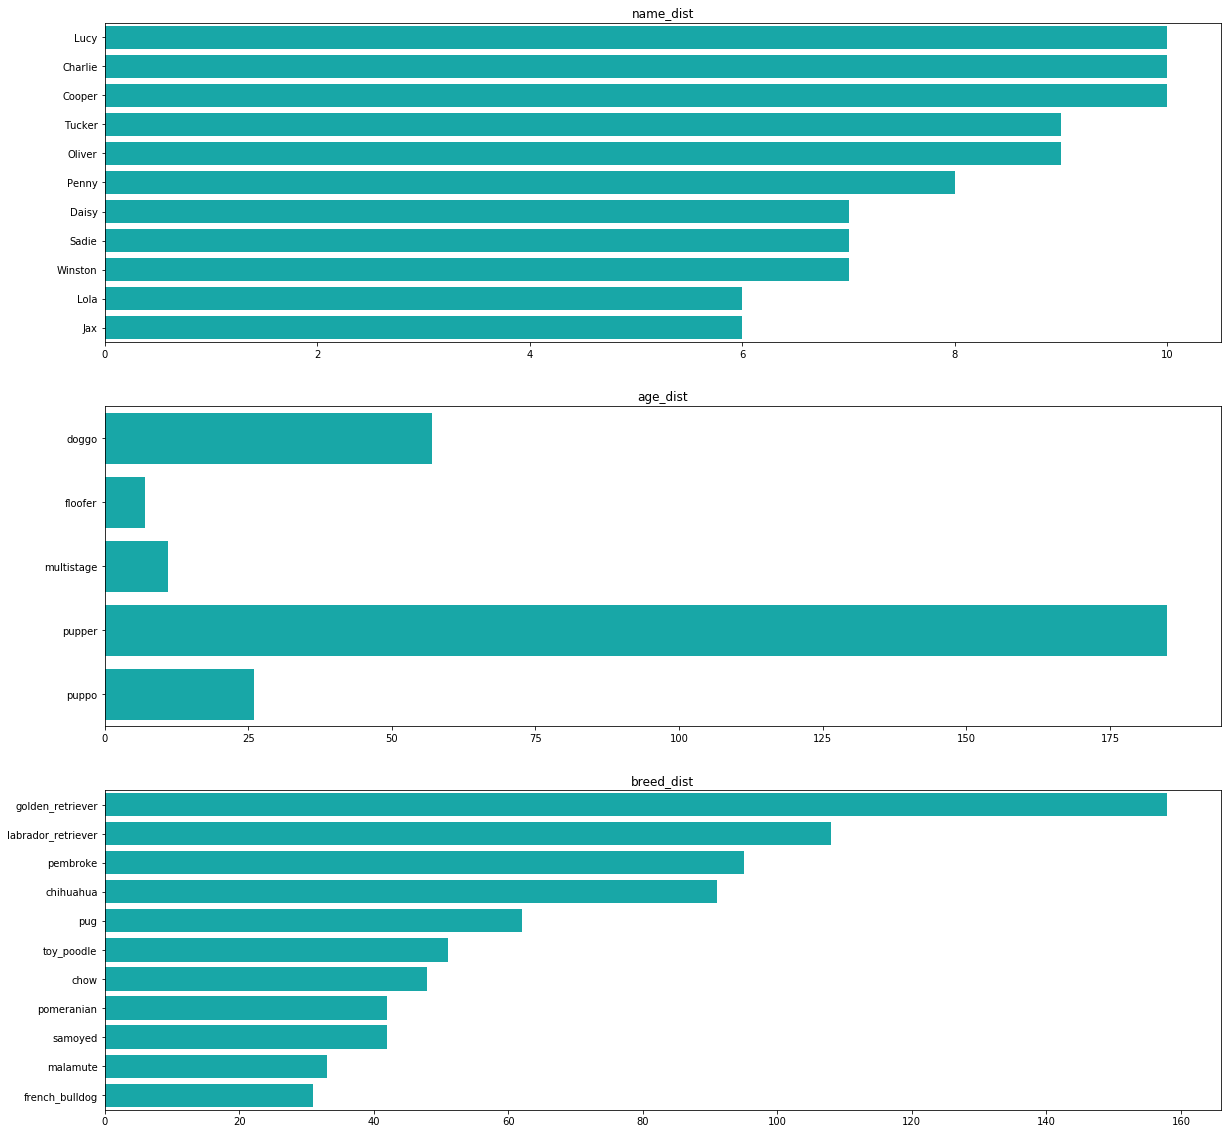

In [77]:
distlists=[namedist,agedist,breeddist]
subpos= [311,312,313]
titles= ['name_dist','age_dist','breed_dist']
plt.figure(figsize=(20,20))
for subpo,distlist,title in zip(subpos,distlists,titles):
    plt.subplot(subpo)
    sns.barplot(data=masterdf,x=distlist.values[:11],y=distlist.index[:11],color='c')
    plt.title(title)

In [78]:
masterdf['retweet_count'].sort_values()

1670    16   
1655    23   
1681    41   
1662    44   
1498    45   
        ..   
53      45849
278     48265
719     52360
363     56625
691     79515
Name: retweet_count, Length: 1686, dtype: int64

In [79]:
masterdf[masterdf['retweet_count']==16]

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls
1670,666102155909144576,2015-11-16 03:55:04,NaN,NaN,1.1,english_setter,16,81,Oh my. Here you are seeing an Adobe Setter giving birth to twins!!! The world is an amazing place. 11/10,https://twitter.com/dog_rates/status/666102155909144576/photo/1


In [80]:
masterdf['retweet_count'].corr(masterdf['favourite_count'])

0.9131756722866896

In [81]:
# log trans func
def translog(x,inverse=False):
    if not inverse:
        return np.log10(x)
    else:
        return 10**x

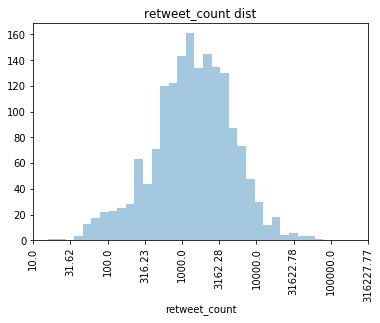

In [82]:
sns.distplot(masterdf['retweet_count'].apply(translog),kde=False)
loc,label=plt.xticks()
plt.xticks(loc,np.round(translog(loc,inverse=True),2),rotation=90)
plt.title('retweet_count dist');

In [83]:
masterdf['favourite_count'].sort_values()

1670    81    
1655    107   
1681    111   
1662    113   
1677    115   
       ...    
100     106827
363     107015
53      107956
691     131075
278     132810
Name: favourite_count, Length: 1686, dtype: int64

[1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5]


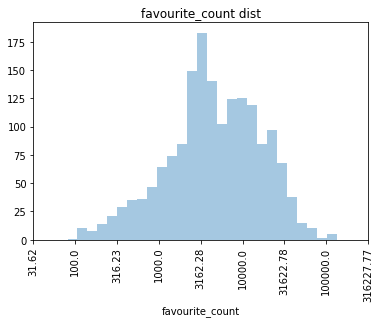

In [84]:
sns.distplot(masterdf['favourite_count'].apply(translog),kde=False)
loc,label=plt.xticks()
print(loc)
plt.xticks(loc,np.round(translog(loc, inverse=True),2),rotation=90)
plt.title('favourite_count dist');

> favourite_count per retweet

In [85]:
masterdf['fav_per_retweet']=masterdf['favourite_count']/masterdf['retweet_count']
masterdf.describe()

,quotient,retweet_count,favourite_count,fav_per_retweet
count,1400.000000,1686.000000,1686.000000,1686.000000
mean,1.149143,2817.118031,9233.109727,3.435343
std,0.209835,4807.199770,12583.246963,1.119640
min,1.000000,16.000000,81.000000,1.097147
25%,1.000000,649.250000,2163.250000,2.643948
50%,1.100000,1437.500000,4440.000000,3.262246
75%,1.200000,3247.750000,11656.750000,3.996168
max,7.500000,79515.000000,132810.000000,11.429577


In [86]:
masterdf[masterdf['fav_per_retweet']==masterdf['fav_per_retweet'].min()]

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet
272,824325613288833024,2017-01-25 18:38:36,NaN,pupper,1.3,pembroke,11848,12999,Retweet the h*ck out of this 13/10 pupper #BellLetsTalk,https://twitter.com/dog_rates/status/824325613288833024/photo/1,1.097147


In [87]:
masterdf[masterdf['fav_per_retweet']==masterdf['fav_per_retweet'].max()]

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet
121,859607811541651456,2017-05-03 03:17:27,NaN,puppo,1.3,golden_retriever,1704,19476,Sorry for the lack of posts today. I came home from school and had to spend quality time with my puppo. Her name is Zoey and she's 13/10,https://twitter.com/dog_rates/status/859607811541651456/photo/1,11.429577


[-0.2  0.   0.2  0.4  0.6  0.8  1.   1.2]


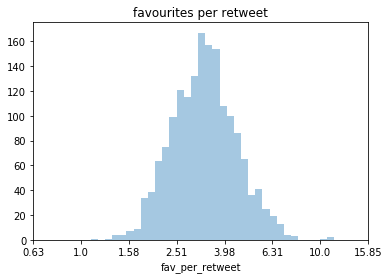

In [88]:
sns.distplot(masterdf['fav_per_retweet'].apply(translog),kde=False)
loc,label=plt.xticks()
print(loc)
plt.xticks(loc,np.round(translog(loc,inverse=True),2))
plt.title('favourites per retweet');

> bivariate

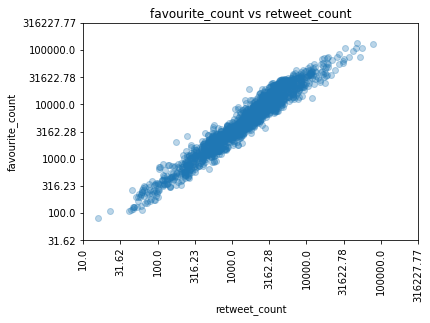

In [89]:
sns.regplot(x=masterdf['retweet_count'].apply(translog),
            y=masterdf['favourite_count'].apply(translog),scatter_kws={'alpha':0.3},fit_reg= False)
xloc,xlabel= plt.xticks()
yloc,ylable=plt.yticks()
plt.xticks(xloc,np.round(translog(xloc,inverse=True),2),rotation=90)
plt.yticks(yloc,np.round(translog(yloc,inverse=True),2))
plt.title('favourite_count vs retweet_count');

In [90]:
# avg fav_per_retweet by dogstage
avgfavstage=masterdf.groupby('dogstage')['fav_per_retweet'].mean()
avgfavstage

dogstage
doggo         3.761854
floofer       3.481009
multistage    3.640430
pupper        3.287123
puppo         4.248934
Name: fav_per_retweet, dtype: float64

avgfavstage includes outliers, use sns boxplot is better for excluding outliers;

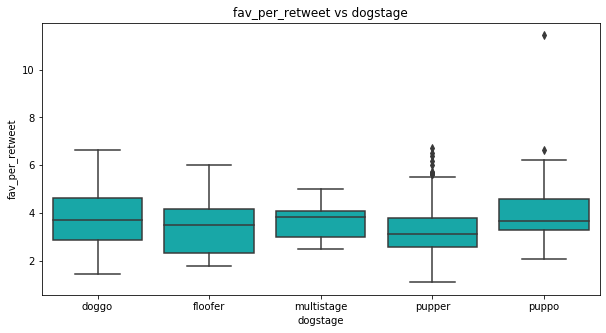

In [91]:
plt.figure(figsize=(10,5))
sns.boxplot(x=masterdf['dogstage'],y=masterdf['fav_per_retweet'],color='c')
plt.title('fav_per_retweet vs dogstage');

top 5 names, breed

In [92]:
namefilter=namedist.index[:5]
breedfilter=breeddist.index[:5]
namefilter,breedfilter

(Index(['Lucy', 'Charlie', 'Cooper', 'Tucker', 'Oliver'], dtype='object'),
 Index(['golden_retriever', 'labrador_retriever', 'pembroke', 'chihuahua',
        'pug'],
       dtype='object'))

In [93]:
topnamesfav_per_retweet=masterdf[masterdf['name'].isin(namefilter)]
topnamesfav_per_retweet.head(2)

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet
14,889278841981685760,2017-07-24 00:19:32,Oliver,NaN,1.3,whippet,5637,25652,This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek,https://twitter.com/dog_rates/status/889278841981685760/video/1,4.550648
94,868552278524837888,2017-05-27 19:39:34,Cooper,NaN,1.2,whippet,2240,10539,Say hello to Cooper. His expression is the same wet or dry. Absolute 12/10 but Coop desperately requests your help\n\n,"https://www.gofundme.com/3ti3nps,https://twitter.com/dog_rates/status/868552278524837888/photo/1,https://twitter.com/dog_rates/status/868552278524837888/photo/1",4.704911


In [94]:
topbreedsfav_per_retweet=masterdf[masterdf['breed'].isin(breedfilter)]

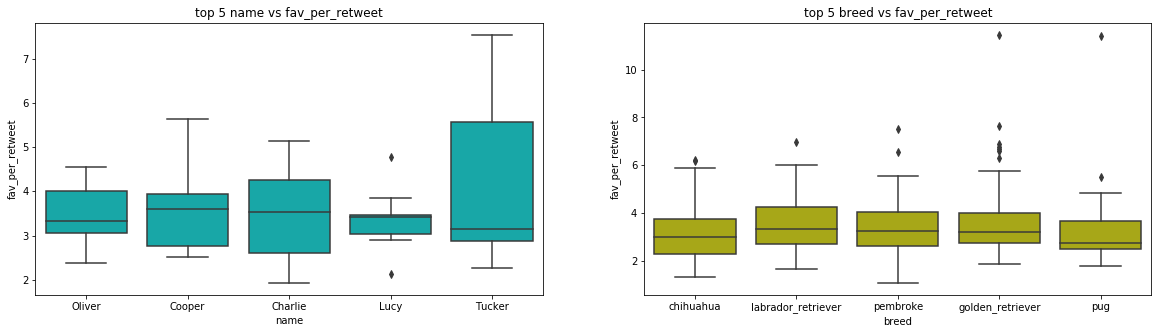

In [95]:
# top 5 name vs fav_per_retweet
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=topnamesfav_per_retweet['name'],y=topnamesfav_per_retweet['fav_per_retweet'],color='c')
plt.title('top 5 name vs fav_per_retweet')

# top 5 breed vs fav_per_retweet
plt.subplot(122)
sns.boxplot(x=topbreedsfav_per_retweet['breed'],y=topbreedsfav_per_retweet['fav_per_retweet'],color='y')
plt.title('top 5 breed vs fav_per_retweet');

In [96]:
topbreedsfav_per_retweet.describe()

,quotient,retweet_count,favourite_count,fav_per_retweet
count,448.00000,514.000000,514.000000,514.000000
mean,1.15625,3224.984436,10489.036965,3.392287
std,0.10912,5492.604711,13477.133719,1.182839
min,1.00000,47.000000,121.000000,1.097147
25%,1.10000,696.500000,2300.500000,2.594690
50%,1.20000,1616.500000,5270.000000,3.161164
75%,1.20000,3932.000000,14657.750000,3.886988
max,1.40000,79515.000000,131075.000000,11.429577


In [97]:
# remove 5% topbreedsfav_per_retweet outiers
topbreedsfavnooutlier=topbreedsfav_per_retweet['fav_per_retweet'].sort_values()[:int(len(topbreedsfav_per_retweet)*.95)].index
topbreedsfavnooutlier

Int64Index([ 272, 1471, 1611,  691, 1169, 1411,  717, 1574, 1323,  610,
            ...
             125,   54,   91,   79,  166,   47,   38,   28,  529,  229],
           dtype='int64', length=488)

In [98]:
# statistical summary
topbreedsfav_per_retweet[topbreedsfav_per_retweet.index.isin(topbreedsfavnooutlier)].groupby('breed')['fav_per_retweet'].mean().sort_values(ascending=False)

breed
labrador_retriever    3.341849
pembroke              3.326166
golden_retriever      3.275672
chihuahua             3.048908
pug                   2.975233
Name: fav_per_retweet, dtype: float64

quotient vs fav_per_retweet

In [99]:
masterdf['quotient'].count()

1400

In [100]:
masterdf['quotient'][masterdf['quotient'].notnull()].sort_values()

1680    1.0
346     1.0
1406    1.0
857     1.0
340     1.0
       ... 
710     1.4
139     1.4
1203    2.6
499     2.7
454     7.5
Name: quotient, Length: 1400, dtype: float64

In [101]:
# remove 1% quotient outliers
masterdf['quotient'][masterdf['quotient'].notnull()].sort_values()[:int(masterdf['quotient'].count()*.99)].max()

1.4

In [102]:
index1 = masterdf['quotient'][masterdf['quotient'].notnull()].sort_values()[:int(masterdf['quotient'].count()*.99)].index
index1

Int64Index([1680,  346, 1406,  857,  340, 1409,  872, 1411,  877,  880,
            ...
             228,  267,  247,  109,   33,  362,   92,  326,  132,  133],
           dtype='int64', length=1386)

In [103]:
quotientfav_per_retweet=masterdf[masterdf.index.isin(index1)]
quotientfav_per_retweet.head(1)

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet
0,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,1.3,chihuahua,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,5.191741


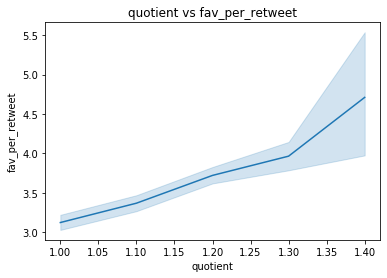

In [104]:
sns.lineplot(data=quotientfav_per_retweet,x='quotient',y='fav_per_retweet')
plt.title('quotient vs fav_per_retweet');

###### multi variance

popularity metrics

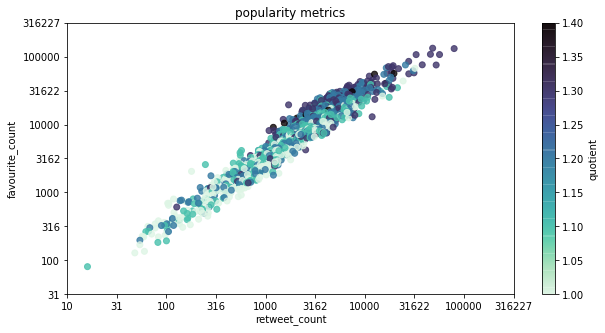

In [105]:
plt.figure(figsize=(10,5))
transx=quotientfav_per_retweet['retweet_count'].apply(translog)
transy=quotientfav_per_retweet['favourite_count'].apply(translog)
plt.scatter(x=transx,y=transy,c=quotientfav_per_retweet['quotient'],alpha=.8,cmap='mako_r')

# set up ticks
xloc,xlabel= plt.xticks()
yloc,ylabel= plt.yticks()
plt.xticks(xloc,translog(xloc,inverse=True).astype(int))
plt.yticks(yloc,translog(yloc,inverse=True).astype(int))

# color bar and labels titles
cbar=plt.colorbar()
cbar.set_label('quotient')
plt.xlabel('retweet_count')
plt.ylabel('favourite_count')
plt.title('popularity metrics');

In [106]:
## this two methods are the same
quotientfav_per_retweet['retweet_count'].apply(translog)==quotientfav_per_retweet['retweet_count'].apply(lambda x: translog(x))

0       True
1       True
2       True
3       True
4       True
        ... 
1670    True
1674    True
1676    True
1679    True
1680    True
Name: retweet_count, Length: 1386, dtype: bool

> top 5 breed dist on retweet_count/favourite_count

In [107]:
# remove outliers
breednooutlierdf=topbreedsfav_per_retweet[topbreedsfav_per_retweet.index.isin(topbreedsfavnooutlier)]
breednooutlierdf

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet
0,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,1.3,chihuahua,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,5.191741
2,891689557279858688,2017-07-30 15:58:51,Darla,NaN,1.3,labrador_retriever,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,4.786702
8,890240255349198849,2017-07-26 15:59:51,Cassie,doggo,1.4,pembroke,7711,32467,This is Cassie. She is a college pup. Studying international doggo communication and stick theory. 14/10 so elegant much sophisticate,https://twitter.com/dog_rates/status/890240255349198849/photo/1,4.210479
11,889665388333682689,2017-07-25 01:55:32,NaN,puppo,1.3,pembroke,8538,38818,Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10,https://twitter.com/dog_rates/status/889665388333682689/photo/1,4.546498
20,887473957103951883,2017-07-19 00:47:34,Canela,NaN,1.3,pembroke,18781,69871,This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",3.720302
...,...,...,...,...,...,...,...,...,...,...,...
1663,666396247373291520,2015-11-16 23:23:41,NaN,NaN,NaN,chihuahua,92,172,Oh goodness. A super rare northeast Qdoba kangaroo mix. Massive feet. No pouch (disappointing). Seems alert. 9/10,https://twitter.com/dog_rates/status/666396247373291520/photo/1,1.869565
1666,666345417576210432,2015-11-16 20:01:42,NaN,NaN,1.0,golden_retriever,146,307,Look at this jokester thinking seat belt laws don't apply to him. Great tongue tho 10/10,https://twitter.com/dog_rates/status/666345417576210432/photo/1,2.102740
1673,666082916733198337,2015-11-16 02:38:37,NaN,NaN,NaN,pug,47,121,Here we have a well-established sunblockerspaniel. Lost his other flip-flop. 6/10 not very waterproof,https://twitter.com/dog_rates/status/666082916733198337/photo/1,2.574468
1676,666063827256086533,2015-11-16 01:22:45,NaN,NaN,1.0,golden_retriever,232,496,This is the happiest dog you will ever see. Very committed owner. Nice couch. 10/10,https://twitter.com/dog_rates/status/666063827256086533/photo/1,2.137931


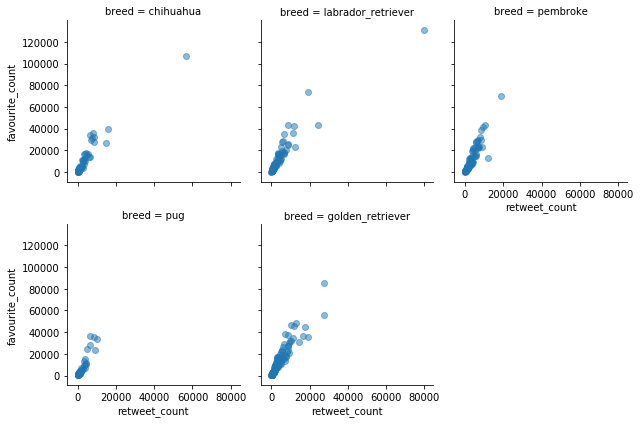

In [108]:
g=sns.FacetGrid(data=breednooutlierdf,col='breed',col_wrap=3)
g.map(plt.scatter,'retweet_count','favourite_count',alpha=.5);

In [109]:
breednooutlierdf['favourite_count'].max()

131075

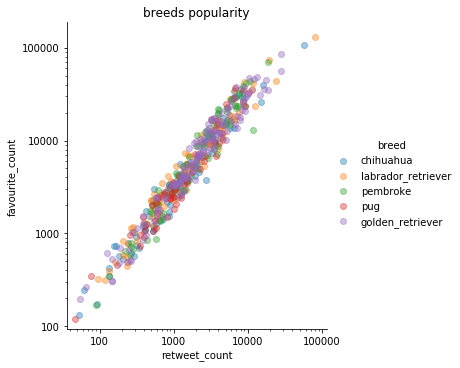

In [132]:
g=sns.FacetGrid(data=breednooutlierdf,hue='breed',height=5)
ticks=[100,1000,10000,100000]
g.map(plt.scatter,'retweet_count','favourite_count',alpha=.4).set(yscale='log',xscale='log',xticks=ticks,yticks=ticks)
g.set(yticks = ticks, yticklabels = ticks,xticks = ticks, xticklabels = ticks)
g.add_legend()
plt.title('breeds popularity');

###### if dogstage/time of tweet it correlated with fav_pertweet

In [111]:
masterdf['morning']=masterdf['timestamp'].dt.hour

In [112]:
# function define morning/night
def morning(i):
    if i <= 12:
        return 'morning'
    else:
        return 'night'

In [113]:
masterdf['morning']=masterdf['morning'].apply(morning)

In [121]:
# get dummy column keep only morning
masterdf['morning']=pd.get_dummies(masterdf['morning']).iloc[:,0]

In [122]:
masterdf['intercept']=1

In [123]:
masterdf['log_favourite_count']=masterdf['favourite_count'].apply(translog)

In [124]:
masterdf

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet,morning,intercept,log_favourite_count
0,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,1.3,chihuahua,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,5.191741,1,1,4.529161
1,891815181378084864,2017-07-31 00:18:03,Archie,NaN,1.2,chihuahua,4328,25461,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10,https://twitter.com/dog_rates/status/891815181378084864/photo/1,5.882856,1,1,4.405875
2,891689557279858688,2017-07-30 15:58:51,Darla,NaN,1.3,labrador_retriever,8964,42908,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us,https://twitter.com/dog_rates/status/891689557279858688/photo/1,4.786702,0,1,4.632538
3,891327558926688256,2017-07-29 16:00:24,Franklin,NaN,1.2,basset,9774,41048,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",4.199714,0,1,4.613292
4,891087950875897856,2017-07-29 00:08:17,NaN,NaN,1.3,chesapeake_bay_retriever,3261,20562,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek,https://twitter.com/dog_rates/status/891087950875897856/photo/1,6.305428,1,1,4.313065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,666049248165822465,2015-11-16 00:24:50,NaN,NaN,NaN,miniature_pinscher,41,111,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10,https://twitter.com/dog_rates/status/666049248165822465/photo/1,2.707317,1,1,2.045323
1682,666044226329800704,2015-11-16 00:04:52,NaN,NaN,NaN,rhodesian_ridgeback,147,311,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10,https://twitter.com/dog_rates/status/666044226329800704/photo/1,2.115646,1,1,2.492760
1683,666033412701032449,2015-11-15 23:21:54,NaN,NaN,NaN,german_shepherd,47,128,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af,https://twitter.com/dog_rates/status/666033412701032449/photo/1,2.723404,0,1,2.107210
1684,666029285002620928,2015-11-15 23:05:30,NaN,NaN,NaN,redbone,48,132,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of,https://twitter.com/dog_rates/status/666029285002620928/photo/1,2.750000,0,1,2.120574


In [125]:
pd.get_dummies(masterdf['dogstage']).index

RangeIndex(start=0, stop=1686, step=1)

In [126]:
# dog stage dummies
masterdf=masterdf.merge(pd.get_dummies(masterdf['dogstage']),left_on=masterdf.index, right_on=pd.get_dummies(masterdf['dogstage']).index)

In [127]:
masterdf=masterdf.iloc[:,1:]

In [128]:
masterdf.head(1)

,tweet_id,timestamp,name,dogstage,quotient,breed,retweet_count,favourite_count,text,expanded_urls,fav_per_retweet,morning,intercept,log_favourite_count,doggo,floofer,multistage,pupper,puppo
0,892177421306343426,2017-08-01 00:17:27,Tilly,NaN,1.3,chihuahua,6514,33819,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10",https://twitter.com/dog_rates/status/892177421306343426/photo/1,5.191741,1,1,4.529161,0,0,0,0,0


In [129]:
model=sm.OLS(masterdf['log_favourite_count'],masterdf[['intercept','morning','floofer','multistage','pupper','puppo']])
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     log_favourite_count   R-squared:                       0.038
Model:                             OLS   Adj. R-squared:                  0.035
Method:                  Least Squares   F-statistic:                     13.37
Date:                 Mon, 13 Apr 2020   Prob (F-statistic):           8.33e-13
Time:                         20:53:46   Log-Likelihood:                -1381.0
No. Observations:                 1686   AIC:                             2774.
Df Residuals:                     1680   BIC:                             2807.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7249      0.020    185.920      0.000       3.686       3.764
morning       -0.1561      0.027     -5.817      0.000      -0.209      -0.103
floofer        0.3322      0.208      1.594      0.111      -0.076       0.741
multistage     0.4517      0.166      2.714      0.007       0.125       0.778
pupper        -0.0185      0.043     -0.431      0.667      -0.103       0.066
puppo          0.4870      0.109      4.470      0.000       0.273       0.701
==============================================================================
Omnibus:                       27.287   Durbin-Watson:                   0.520
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.324
Skew:                          -0.317   Prob(JB):                     7.07e-07
Kurtosis:                       3.014   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [131]:
model=sm.OLS(masterdf['fav_per_retweet'],masterdf[['intercept','morning','floofer','multistage','pupper','puppo']])
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        fav_per_retweet   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     6.892
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.23e-06
Time:                        20:53:46   Log-Likelihood:                -2565.2
No. Observations:                1686   AIC:                             5142.
Df Residuals:                    1680   BIC:                             5175.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.5531      0.040     87.857      0.000       3.474       3.632
morning       -0.2220      0.054     -4.098      0.000      -0.328      -0.116
floofer        0.0548      0.421      0.130      0.896      -0.770       0.880
multistage     0.1883      0.336      0.560      0.575      -0.471       0.847
pupper        -0.1519      0.087     -1.754      0.080      -0.322       0.018
puppo          0.7642      0.220      3.475      0.001       0.333       1.196
==============================================================================
Omnibus:                      456.863   Durbin-Watson:                   1.326
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1590.297
Skew:                           1.310   Prob(JB):                         0.00
Kurtosis:                       6.971   Cond. No.                         18.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""